In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tempfile import TemporaryDirectory
import time

import torch
import torch.nn as nn
from torch import Tensor
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import torch.backends.cudnn as cudnn

import torchvision
from torchvision.models import resnet101, resnet50, resnet18
import torchvision.transforms as transforms
import torchvision.transforms as tt
from torchvision.datasets import CIFAR100 
from torchvision import datasets, models, transforms
from torchinfo import summary

from tqdm import tqdm

In [2]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)

In [3]:
os.makedirs('/kaggle/working/models')

In [ ]:
!rm -rf /kaggle/working/*

# Tiny Imagenet dataset - 200 classes

# Validation set

In [4]:
classes_indexing={'n01443537': 0, 'n01629819': 1, 'n01641577': 2, 'n01644900': 3, 'n01698640': 4, 'n01742172': 5, 'n01768244': 6, 'n01770393': 7, 'n01774384': 8,
                  'n01774750': 9, 'n01784675': 10, 'n01855672': 11, 'n01882714': 12, 'n01910747': 13, 'n01917289': 14, 'n01944390': 15, 'n01945685': 16, 'n01950731': 17,
                  'n01983481': 18, 'n01984695': 19, 'n02002724': 20, 'n02056570': 21, 'n02058221': 22, 'n02074367': 23, 'n02085620': 24, 'n02094433': 25, 'n02099601': 26,
                  'n02099712': 27, 'n02106662': 28, 'n02113799': 29, 'n02123045': 30, 'n02123394': 31, 'n02124075': 32, 'n02125311': 33, 'n02129165': 34, 'n02132136': 35,
                  'n02165456': 36, 'n02190166': 37, 'n02206856': 38, 'n02226429': 39, 'n02231487': 40, 'n02233338': 41, 'n02236044': 42, 'n02268443': 43, 'n02279972': 44,
                  'n02281406': 45, 'n02321529': 46, 'n02364673': 47, 'n02395406': 48, 'n02403003': 49, 'n02410509': 50, 'n02415577': 51, 'n02423022': 52, 'n02437312': 53,
                  'n02480495': 54, 'n02481823': 55, 'n02486410': 56, 'n02504458': 57, 'n02509815': 58, 'n02666196': 59, 'n02669723': 60, 'n02699494': 61, 'n02730930': 62,
                  'n02769748': 63, 'n02788148': 64, 'n02791270': 65, 'n02793495': 66, 'n02795169': 67, 'n02802426': 68, 'n02808440': 69, 'n02814533': 70, 'n02814860': 71,
                  'n02815834': 72, 'n02823428': 73, 'n02837789': 74, 'n02841315': 75, 'n02843684': 76, 'n02883205': 77, 'n02892201': 78, 'n02906734': 79, 'n02909870': 80,
                  'n02917067': 81, 'n02927161': 82, 'n02948072': 83, 'n02950826': 84, 'n02963159': 85, 'n02977058': 86, 'n02988304': 87, 'n02999410': 88, 'n03014705': 89,
                  'n03026506': 90, 'n03042490': 91, 'n03085013': 92, 'n03089624': 93, 'n03100240': 94, 'n03126707': 95, 'n03160309': 96, 'n03179701': 97, 'n03201208': 98,
                  'n03250847': 99, 'n03255030': 100, 'n03355925': 101, 'n03388043': 102, 'n03393912': 103, 'n03400231': 104, 'n03404251': 105, 'n03424325': 106,
                  'n03444034': 107, 'n03447447': 108, 'n03544143': 109, 'n03584254': 110, 'n03599486': 111, 'n03617480': 112, 'n03637318': 113, 'n03649909': 114, 
                  'n03662601': 115, 'n03670208': 116, 'n03706229': 117, 'n03733131': 118, 'n03763968': 119, 'n03770439': 120, 'n03796401': 121, 'n03804744': 122,
                  'n03814639': 123, 'n03837869': 124, 'n03838899': 125, 'n03854065': 126, 'n03891332': 127, 'n03902125': 128, 'n03930313': 129, 'n03937543': 130,
                  'n03970156': 131, 'n03976657': 132, 'n03977966': 133, 'n03980874': 134, 'n03983396': 135, 'n03992509': 136, 'n04008634': 137, 'n04023962': 138, 
                  'n04067472': 139, 'n04070727': 140, 'n04074963': 141, 'n04099969': 142, 'n04118538': 143, 'n04133789': 144, 'n04146614': 145, 'n04149813': 146,
                  'n04179913': 147, 'n04251144': 148, 'n04254777': 149, 'n04259630': 150, 'n04265275': 151, 'n04275548': 152, 'n04285008': 153, 'n04311004': 154,
                  'n04328186': 155, 'n04356056': 156, 'n04366367': 157, 'n04371430': 158, 'n04376876': 159, 'n04398044': 160, 'n04399382': 161, 'n04417672': 162,
                  'n04456115': 163, 'n04465501': 164, 'n04486054': 165, 'n04487081': 166, 'n04501370': 167, 'n04507155': 168, 'n04532106': 169, 'n04532670': 170,
                  'n04540053': 171, 'n04560804': 172, 'n04562935': 173, 'n04596742': 174, 'n04597913': 175, 'n06596364': 176, 'n07579787': 177, 'n07583066': 178,
                  'n07614500': 179, 'n07615774': 180, 'n07695742': 181, 'n07711569': 182, 'n07715103': 183, 'n07720875': 184, 'n07734744': 185, 'n07747607': 186,
                  'n07749582': 187, 'n07753592': 188, 'n07768694': 189, 'n07871810': 190, 'n07873807': 191, 'n07875152': 192, 'n07920052': 193, 'n09193705': 194,
                  'n09246464': 195, 'n09256479': 196, 'n09332890': 197, 'n09428293': 198, 'n12267677': 199}

In [5]:
classes_indexing_inverted={0: 'n01443537', 1: 'n01629819', 2: 'n01641577', 3: 'n01644900', 4: 'n01698640', 5: 'n01742172', 6: 'n01768244', 7: 'n01770393', 8: 'n01774384', 9: 'n01774750',
                           10: 'n01784675', 11: 'n01855672', 12: 'n01882714', 13: 'n01910747', 14: 'n01917289', 15: 'n01944390', 16: 'n01945685', 17: 'n01950731', 18: 'n01983481', 19: 'n01984695',
                           20: 'n02002724', 21: 'n02056570', 22: 'n02058221', 23: 'n02074367', 24: 'n02085620', 25: 'n02094433', 26: 'n02099601', 27: 'n02099712', 28: 'n02106662', 29: 'n02113799',
                           30: 'n02123045', 31: 'n02123394', 32: 'n02124075', 33: 'n02125311', 34: 'n02129165', 35: 'n02132136', 36: 'n02165456', 37: 'n02190166', 38: 'n02206856', 39: 'n02226429',
                           40: 'n02231487', 41: 'n02233338', 42: 'n02236044', 43: 'n02268443', 44: 'n02279972', 45: 'n02281406', 46: 'n02321529', 47: 'n02364673', 48: 'n02395406', 49: 'n02403003',
                           50: 'n02410509', 51: 'n02415577', 52: 'n02423022', 53: 'n02437312', 54: 'n02480495', 55: 'n02481823', 56: 'n02486410', 57: 'n02504458', 58: 'n02509815', 59: 'n02666196',
                           60: 'n02669723', 61: 'n02699494', 62: 'n02730930', 63: 'n02769748', 64: 'n02788148', 65: 'n02791270', 66: 'n02793495', 67: 'n02795169', 68: 'n02802426', 69: 'n02808440',
                           70: 'n02814533', 71: 'n02814860', 72: 'n02815834', 73: 'n02823428', 74: 'n02837789', 75: 'n02841315', 76: 'n02843684', 77: 'n02883205', 78: 'n02892201', 79: 'n02906734',
                           80: 'n02909870', 81: 'n02917067', 82: 'n02927161', 83: 'n02948072', 84: 'n02950826', 85: 'n02963159', 86: 'n02977058', 87: 'n02988304', 88: 'n02999410', 89: 'n03014705',
                           90: 'n03026506', 91: 'n03042490', 92: 'n03085013', 93: 'n03089624', 94: 'n03100240', 95: 'n03126707', 96: 'n03160309', 97: 'n03179701', 98: 'n03201208', 99: 'n03250847',
                           100: 'n03255030', 101: 'n03355925', 102: 'n03388043', 103: 'n03393912', 104: 'n03400231', 105: 'n03404251', 106: 'n03424325', 107: 'n03444034', 108: 'n03447447', 109: 'n03544143',
                           110: 'n03584254', 111: 'n03599486', 112: 'n03617480', 113: 'n03637318', 114: 'n03649909', 115: 'n03662601', 116: 'n03670208', 117: 'n03706229', 118: 'n03733131', 119: 'n03763968',
                           120: 'n03770439', 121: 'n03796401', 122: 'n03804744', 123: 'n03814639', 124: 'n03837869', 125: 'n03838899', 126: 'n03854065', 127: 'n03891332', 128: 'n03902125', 129: 'n03930313',
                           130: 'n03937543', 131: 'n03970156', 132: 'n03976657', 133: 'n03977966', 134: 'n03980874', 135: 'n03983396', 136: 'n03992509', 137: 'n04008634', 138: 'n04023962', 139: 'n04067472',
                           140: 'n04070727', 141: 'n04074963', 142: 'n04099969', 143: 'n04118538', 144: 'n04133789', 145: 'n04146614', 146: 'n04149813', 147: 'n04179913', 148: 'n04251144', 149: 'n04254777',
                           150: 'n04259630', 151: 'n04265275', 152: 'n04275548', 153: 'n04285008', 154: 'n04311004', 155: 'n04328186', 156: 'n04356056', 157: 'n04366367', 158: 'n04371430', 159: 'n04376876',
                           160: 'n04398044', 161: 'n04399382', 162: 'n04417672', 163: 'n04456115', 164: 'n04465501', 165: 'n04486054', 166: 'n04487081', 167: 'n04501370', 168: 'n04507155', 169: 'n04532106',
                           170: 'n04532670', 171: 'n04540053', 172: 'n04560804', 173: 'n04562935', 174: 'n04596742', 175: 'n04597913', 176: 'n06596364', 177: 'n07579787', 178: 'n07583066', 179: 'n07614500',
                           180: 'n07615774', 181: 'n07695742', 182: 'n07711569', 183: 'n07715103', 184: 'n07720875', 185: 'n07734744', 186: 'n07747607', 187: 'n07749582', 188: 'n07753592', 189: 'n07768694',
                           190: 'n07871810', 191: 'n07873807', 192: 'n07875152', 193: 'n07920052', 194: 'n09193705', 195: 'n09246464', 196: 'n09256479', 197: 'n09332890', 198: 'n09428293', 199: 'n12267677'}

In [5]:
classes_indexing.keys()

dict_keys(['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n02841315', '

In [6]:
annotations_filepath='/kaggle/input/tiny-imagenet/tiny-imagenet-200/val/val_annotations.txt'
annotations=pd.read_csv(annotations_filepath,sep='\t', header=None)
images_filepath='/kaggle/input/tiny-imagenet/tiny-imagenet-200/val/images/'

In [7]:
def load_val(annotations, im_directory):
    images=[]
    labels=[]
    for i, row in annotations.iterrows():
        image_name, label = row[0], row[1]
        image_path=os.path.join(im_directory,image_name)
        image=Image.open(image_path)
        if image.mode=='RGB':
            image_np=np.array(image) 
            #image_np=image_np.transpose(2,0,1)
            images.append(image_np)
            labels.append(label)
        
    return images, labels

class ValDataset(Dataset):
    def __init__(self, images, labels, label_idx_dict, transform=None):
        self.images=images
        self.labels=labels
        self.transform=transform
        self.label_idx_dict=label_idx_dict
        self.classes=label_idx_dict.keys()
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,idx):
        image=self.images[idx]
        label=self.labels[idx]
        new_label=self.label_idx_dict[label]
        
        if self.transform:
            image=self.transform(image)
        
        return image, new_label   

In [8]:
stats=((0.48023698, 0.44806704, 0.3975036), (0.27643642, 0.2688633, 0.28158993))
val_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

In [9]:
val_images, val_labels=load_val(annotations,images_filepath)

In [10]:
val_dataset=ValDataset(val_images,val_labels, classes_indexing,val_transform)

In [11]:
batch_size=128
val_dataloader=DataLoader(val_dataset,batch_size=batch_size, shuffle=True)

In [ ]:
num_batches_to_inspect = 1
for batch_idx, (images, labels) in enumerate(val_dataloader):
    if batch_idx >= num_batches_to_inspect:
        break

    print(f"Batch {batch_idx + 1}:")
    for i in range(len(images)):
        print(f"Image {i + 1}:")
        print("Label:", labels[i])
        print()
        print(type(images[0]))
        print(images[0].shape)

    print()  # Add a newline between batches

# Train set

In [13]:

training_folder_name = '../input/tiny-imagenet/tiny-imagenet-200/train'
stats = ((0.48023698, 0.44806704, 0.3975036), (0.27643642, 0.2688633, 0.28158993))


train_transform = tt.Compose([
    tt.TrivialAugmentWide(80),
    tt.ToTensor(),
    tt.Normalize(*stats)
])


original_dataset = datasets.ImageFolder(
    root=training_folder_name,
    transform=tt.ToTensor()  # Only convert to tensor to visualize original images
)

print('done')
transformed_dataset = datasets.ImageFolder(
    root=training_folder_name,
    transform=train_transform
)


done


In [52]:
for i in all_labels:
    label=original_dataset.classes[i]
    new_label=filt_class_map[label]
    print(label)
    print(new_label)
    break

n02132136
bear


In [14]:
original_loader = DataLoader(original_dataset, batch_size=8, shuffle=False)
transformed_loader = DataLoader(transformed_dataset, batch_size=8, shuffle=False)

# Get a batch of original and transformed images
original_images, _ = next(iter(original_loader))
transformed_images, _ = next(iter(transformed_loader))


In [60]:
def denormalize(img, mean, std):
    img = img.clone()  # avoid modifying the original image
    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)
    return img

# Denormalize the batch of transformed images
transformed_images_denorm = torch.stack([denormalize(img, stats[0], stats[1]) for img in transformed_images])

# Convert tensor to numpy array for plotting
def tensor_to_np(img_tensor):
    return np.transpose(img_tensor.numpy(), (1, 2, 0))

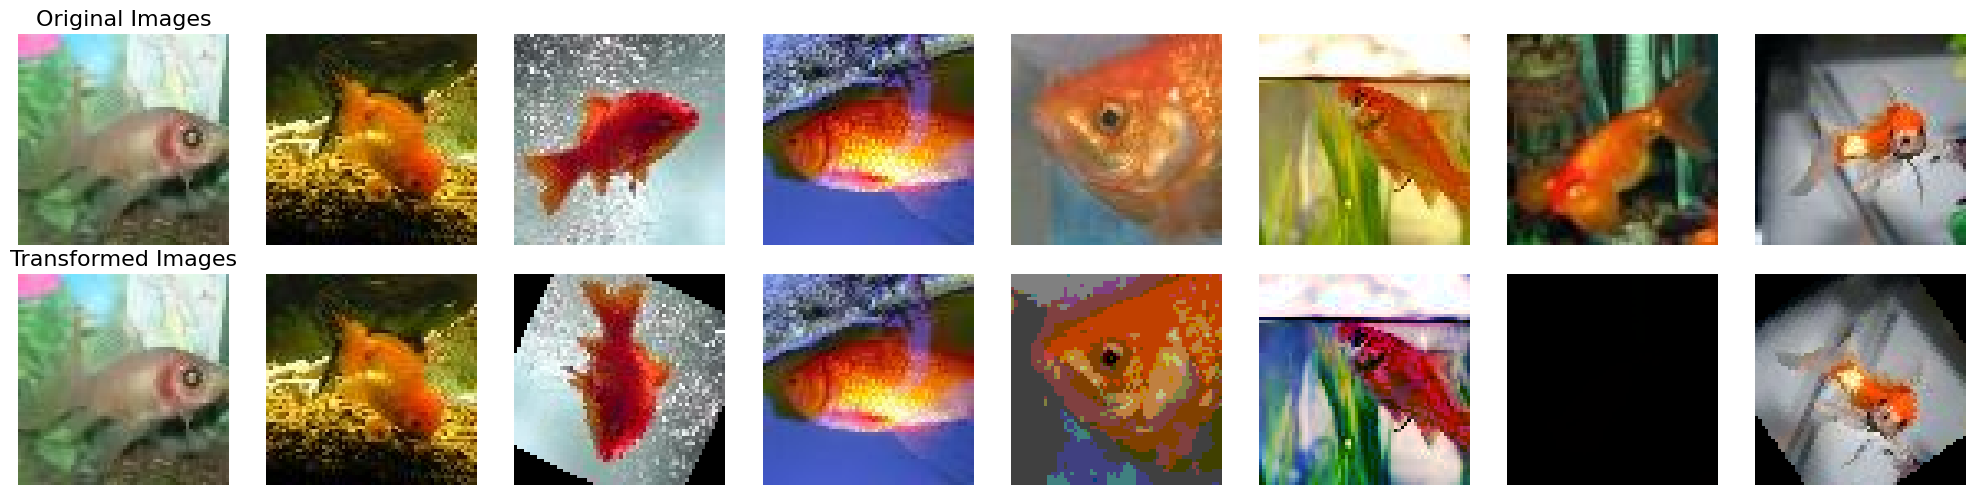

In [61]:
# Plot the images
fig, axes = plt.subplots(2, 8, figsize=(20, 5))

for i in range(8):
    # Original images
    orig_img = tensor_to_np(original_images[i])
    axes[0, i].imshow(orig_img)
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_title('Original Images', fontsize=16)
    
    # Transformed images
    trans_img = tensor_to_np(transformed_images_denorm[i])
    axes[1, i].imshow(trans_img)
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_title('Transformed Images', fontsize=16)

plt.tight_layout()
plt.show()

In [11]:
training_folder_name = '../input/tiny-imagenet/tiny-imagenet-200/train'

In [12]:
stats=((0.48023698, 0.44806704, 0.3975036), (0.27643642, 0.2688633, 0.28158993))
#stats=((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
train_transform = tt.Compose([
    tt.TrivialAugmentWide(80),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

In [ ]:
imgs_train = torch.stack([img_t for img_t ,_ in full_dataset],dim=3)

mean = imgs_train.view(3,-1).mean(dim=1).numpy()
std = imgs_train.view(3, -1).std(dim=1).numpy()
print(mean, std)

In [13]:
full_dataset= torchvision.datasets.ImageFolder(
        root=training_folder_name,
        transform=train_transform
)

In [ ]:
classes_indexing_1={}
for i, label in enumerate(full_dataset.classes):
    classes_indexing_1[label]=full_dataset.class_to_idx[label]

print(classes_indexing_1)    

In [ ]:
for i, (img, labels) in enumerate(full_dataset):
    if i<=5:
        print(type(labels))
        print(labels)
        print()
    else:
        break

In [ ]:
img, label=full_dataset[0]
print(img.shape)

In [14]:
batch_size=128
train_dataloader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

In [ ]:
num_batches_to_inspect = 1
for batch_idx, (images, labels) in enumerate(train_dataloader):
    if batch_idx >= num_batches_to_inspect:
        break

    print(f"Batch {batch_idx + 1}:")
    for i in range(len(images)):
        print(f"Image {i + 1}:")
        print("Label:", labels[i])  # Assuming labels are directly accessible
        print(type(labels[i]))
        print(labels[i].shape)
        print()
        print(type(images[0]))
        print(images[0].shape)
        # You can print or visualize the image here if needed
        # print(images[i])

    print()  # Add a newline between batches

# COARSE LABELS

## Training set

In [25]:
training_folder_name = '../input/tiny-imagenet/tiny-imagenet-200/train'

In [26]:
fine_classes = sorted(os.listdir(training_folder_name))
print(fine_classes)
print(len(fine_classes))

['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n02841315', 'n02843684'

In [55]:
stats=((0.48023698, 0.44806704, 0.3975036), (0.27643642, 0.2688633, 0.28158993))
#stats=((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
train_transform = tt.Compose([
    tt.TrivialAugmentWide(15),
    #tt.RandomHorizontalFlip(),
    #tt.RandomCrop(32, padding=4, padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

In [56]:
full_dataset_train = torchvision.datasets.ImageFolder(
        root=training_folder_name,
        transform=train_transform
    )

In [ ]:
image, label=full_dataset_train[499]
print(image)
print(label)
print(full_dataset_train.classes[label])

# Classes mapping for coarse labels

In [23]:
class_mapping_df = pd.read_csv('../input/imagenet-classes/imagenet_categories_synset.csv', header=None)
class_mapping_df.head()

,0,1,2,3
0,index,synset,words,categories
1,0,n01440764,"tench, Tinca tinca",fish
2,1,n01443537,"goldfish, Carassius auratus",fish
3,2,n01484850,"great white shark, white shark, man-eater, man...",shark
4,3,n01491361,"tiger shark, Galeocerdo cuvieri",shark


In [15]:
class_mapping=dict(zip(class_mapping_df[1], class_mapping_df[3]))

In [ ]:
count = 0
for key, value in class_mapping.items():
    if count < 5:
        print(key, value)
        count += 1

## Classes mapping filtered

In [27]:
filtered_class_mapping_df=class_mapping_df[class_mapping_df[1].isin(fine_classes)]

In [7]:
filtered_class_mapping_df.head()

,0,1,2,3
2,1,n01443537,"goldfish, Carassius auratus",fish
26,25,n01629819,"European fire salamander, Salamandra salamandra",salamander
31,30,n01641577,"bullfrog, Rana catesbeiana",frog
33,32,n01644900,"tailed frog, bell toad, ribbed toad, tailed to...",frog
51,50,n01698640,"American alligator, Alligator mississipiensis",crocodile


In [28]:
class_id_to_name=dict(zip(filtered_class_mapping_df[1],filtered_class_mapping_df[2]))

In [ ]:
print(len(filtered_class_mapping_df))

In [29]:
filt_class_map=dict(zip(filtered_class_mapping_df[1],filtered_class_mapping_df[3]))

In [33]:
filt_class_map

{'n01443537': 'fish',
 'n01629819': 'salamander',
 'n01641577': 'frog',
 'n01644900': 'frog',
 'n01698640': 'crocodile',
 'n01742172': 'snake',
 'n01768244': 'trilobite',
 'n01770393': 'arachnid',
 'n01774384': 'arachnid',
 'n01774750': 'arachnid',
 'n01784675': 'bug',
 'n01855672': 'bird',
 'n01882714': 'marsupial',
 'n01910747': 'fish',
 'n01917289': 'coral',
 'n01944390': 'mollusk',
 'n01945685': 'mollusk',
 'n01950731': 'mollusk',
 'n01983481': 'crustacean',
 'n01984695': 'crustacean',
 'n02002724': 'bird',
 'n02056570': 'bird',
 'n02058221': 'bird',
 'n02074367': 'marine mammals',
 'n02085620': 'dog',
 'n02094433': 'dog',
 'n02099601': 'dog',
 'n02099712': 'dog',
 'n02106662': 'dog',
 'n02113799': 'dog',
 'n02123045': 'cat',
 'n02123394': 'cat',
 'n02124075': 'cat',
 'n02125311': 'wild cat',
 'n02129165': 'wild cat',
 'n02132136': 'bear',
 'n02165456': 'bug',
 'n02190166': 'bug',
 'n02206856': 'bug',
 'n02226429': 'bug',
 'n02231487': 'bug',
 'n02233338': 'bug',
 'n02236044': 'bug

In [ ]:
for i in range(len(fine_classes)):
    print(filt_class_map[fine_classes[i]])

In [53]:
class CustomTinyImagenetDataset(torch.utils.data.Dataset):
    def __init__(self, original_dataset, class_mapping):
        self.original_dataset = original_dataset
        self.class_mapping = class_mapping
        self.new_classes = self._get_new_classes()
        self.class_counts = self._get_class_counts()
        self.class_to_idx = {class_name: idx for idx, class_name in enumerate(self.new_classes)}

    def __len__(self):
        return len(self.original_dataset)

    def __getitem__(self, idx):
        image, label = self.original_dataset[idx]

        # Map original label to new label using class mapping
        old_class_name = self.original_dataset.classes[label]
        new_class_name = self.class_mapping.get(old_class_name)
        new_label = self.class_to_idx[new_class_name]

        return image, new_label

    def _get_new_classes(self):
        new_classes = set(self.class_mapping.values())
        return sorted(list(new_classes))

    def _get_class_counts(self):
        class_counts = {class_name: 0 for class_name in self.new_classes}
        for _, label in self.original_dataset:
            old_class_name = self.original_dataset.classes[label]
            new_class_name = self.class_mapping.get(old_class_name)
            class_counts[new_class_name] += 1
        return class_counts

In [57]:
custom_dataset = CustomTinyImagenetDataset(full_dataset_train, filt_class_map)

In [23]:
batch_size=128
train_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

In [58]:
custom_dataset.class_to_idx

{'accessory': 0,
 'arachnid': 1,
 'ball': 2,
 'bear': 3,
 'bird': 4,
 'boat': 5,
 'bug': 6,
 'building': 7,
 'butterfly': 8,
 'cat': 9,
 'clothing': 10,
 'container': 11,
 'cooking': 12,
 'coral': 13,
 'crocodile': 14,
 'crustacean': 15,
 'decor': 16,
 'dog': 17,
 'echinoderms': 18,
 'electronics': 19,
 'fence': 20,
 'fish': 21,
 'food': 22,
 'frog': 23,
 'fruit': 24,
 'fungus': 25,
 'furniture': 26,
 'hat': 27,
 'hog': 28,
 'instrument': 29,
 'lab equipment': 30,
 'marine mammals': 31,
 'marsupial': 32,
 'mollusk': 33,
 'outdoor scene': 34,
 'paper': 35,
 'plant': 36,
 'primate': 37,
 'rodent': 38,
 'salamander': 39,
 'snake': 40,
 'sports equipment': 41,
 'technology': 42,
 'tool': 43,
 'toy': 44,
 'train': 45,
 'trilobite': 46,
 'ungulate': 47,
 'vegetable': 48,
 'vehicle': 49,
 'weapon': 50,
 'wild cat': 51}

In [ ]:
super_ind={'accessory': 0,
 'arachnid': 1,
 'ball': 2,
 'bear': 3,
 'bird': 4,
 'boat': 5,
 'bug': 6,
 'building': 7,
 'butterfly': 8,
 'cat': 9,
 'clothing': 10,
 'container': 11,
 'cooking': 12,
 'coral': 13,
 'crocodile': 14,
 'crustacean': 15,
 'decor': 16,
 'dog': 17,
 'echinoderms': 18,
 'electronics': 19,
 'fence': 20,
 'fish': 21,
 'food': 22,
 'frog': 23,
 'fruit': 24,
 'fungus': 25,
 'furniture': 26,
 'hat': 27,
 'hog': 28,
 'instrument': 29,
 'lab equipment': 30,
 'marine mammals': 31,
 'marsupial': 32,
 'mollusk': 33,
 'outdoor scene': 34,
 'paper': 35,
 'plant': 36,
 'primate': 37,
 'rodent': 38,
 'salamander': 39,
 'snake': 40,
 'sports equipment': 41,
 'technology': 42,
 'tool': 43,
 'toy': 44,
 'train': 45,
 'trilobite': 46,
 'ungulate': 47,
 'vegetable': 48,
 'vehicle': 49,
 'weapon': 50,
 'wild cat': 51}

In [ ]:
custom_dataset.new_classes[21]

In [ ]:
num_batches_to_inspect = 1
for index, (images, labels) in enumerate(custom_dataset):
    if index >= num_batches_to_inspect:
        break
    print(labels)

In [ ]:
new_classes = custom_dataset.new_classes
len(new_classes)

In [ ]:
class_counts = custom_dataset.class_counts
print(class_counts)

In [ ]:
class_to_idx = custom_dataset.class_to_idx
print(class_to_idx)

# Coarse labels distibution

In [4]:
tiny_imagenet_coarse_num_im={'accessory': 2500, 'arachnid': 1500, 'ball': 1500, 'bear': 1000, 'bird': 2000, 'boat': 1000, 'bug': 4500,
                             'building': 4000, 'butterfly': 1000, 'cat': 1500, 'clothing': 7000, 'container': 2000, 'cooking': 2500,
                             'coral': 1000, 'crocodile': 500, 'crustacean': 1000, 'decor': 1500, 'dog': 3000, 'echinoderms': 500,
                             'electronics': 4000, 'fence': 500, 'fish': 1000, 'food': 5500, 'frog': 1000, 'fruit': 2000, 'fungus': 500,
                             'furniture': 3500, 'hat': 500, 'hog': 500, 'instrument': 1500, 'lab equipment': 500, 'marine mammals': 500,
                             'marsupial': 500, 'mollusk': 1500, 'outdoor scene': 7500, 'paper': 500, 'plant': 500, 'primate': 1500,
                             'rodent': 500, 'salamander': 500, 'snake': 500, 'sports equipment': 2000, 'technology': 3000, 'tool': 6000,
                             'toy': 500, 'train': 1000, 'trilobite': 500, 'ungulate': 3000, 'vegetable': 1000, 'vehicle': 6500, 'weapon': 1000, 'wild cat': 1000}

In [5]:
categories=list(tiny_imagenet_coarse_num_im.keys())
img_count=list(tiny_imagenet_coarse_num_im.values())

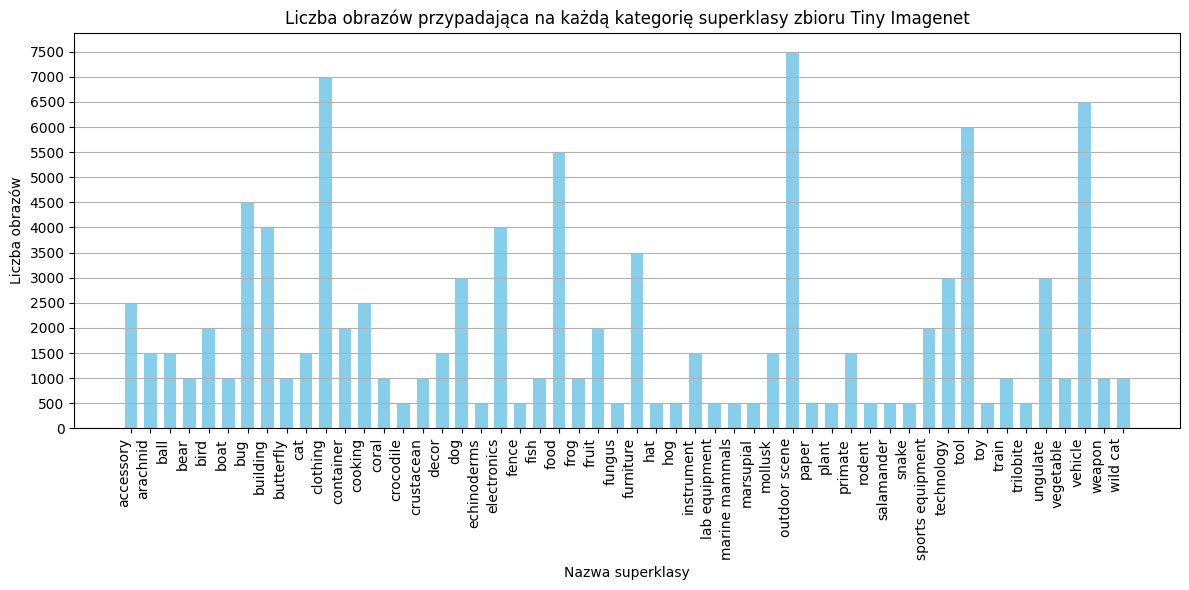

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(categories, img_count, color='skyblue', width=0.65)
plt.grid(axis='y')
plt.xlabel('Nazwa superklasy')
plt.ylabel('Liczba obrazów')
plt.title('Liczba obrazów przypadająca na każdą kategorię superklasy zbioru Tiny Imagenet')
plt.xticks(rotation=90,ha='right')
plt.yticks(range(0,7501,500))
plt.tight_layout()
plt.savefig('tiny_superclasses_plot_II.png')
plt.show()

# Validation/Test set

In [36]:
coarse_classes_indexing={'accessory': 0, 'arachnid': 1, 'ball': 2, 'bear': 3, 'bird': 4, 'boat': 5, 'bug': 6, 'building': 7, 'butterfly': 8, 'cat': 9, 'clothing': 10,
                         'container': 11, 'cooking': 12, 'coral': 13, 'crocodile': 14, 'crustacean': 15, 'decor': 16, 'dog': 17, 'echinoderms': 18, 'electronics': 19,
                         'fence': 20, 'fish': 21, 'food': 22, 'frog': 23, 'fruit': 24, 'fungus': 25, 'furniture': 26, 'hat': 27, 'hog': 28, 'instrument': 29,
                         'lab equipment': 30, 'marine mammals': 31, 'marsupial': 32, 'mollusk': 33, 'outdoor scene': 34, 'paper': 35, 'plant': 36, 'primate': 37,
                         'rodent': 38, 'salamander': 39, 'snake': 40, 'sports equipment': 41, 'technology': 42, 'tool': 43, 'toy': 44, 'train': 45, 'trilobite': 46,
                         'ungulate': 47, 'vegetable': 48, 'vehicle': 49, 'weapon': 50, 'wild cat': 51}

In [25]:
def load_val(annotations, im_directory):
    images=[]
    labels=[]
    for i, row in annotations.iterrows():
        image_name, label = row[0], row[1]
        image_path=os.path.join(im_directory,image_name)
        image=Image.open(image_path)
        if image.mode=='RGB':
            image_np=np.array(image) 
            #image_np=image_np.transpose(2,0,1)
            images.append(image_np)
            labels.append(label)
        
    return images, labels

class ValDataset(Dataset):
    def __init__(self, images, labels, label_idx_dict, transform=None):
        self.images=images
        self.labels=labels
        self.transform=transform
        self.label_idx_dict=label_idx_dict
        self.classes=label_idx_dict.keys()
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,idx):
        image=self.images[idx]
        label=self.labels[idx]
        new_label=self.label_idx_dict[label]
        
        if self.transform:
            image=self.transform(image)
        
        return image, new_label   

In [26]:
annotations_filepath='/kaggle/input/tiny-imagenet/tiny-imagenet-200/val/val_annotations.txt'
annotations=pd.read_csv(annotations_filepath,sep='\t', header=None)
images_filepath='/kaggle/input/tiny-imagenet/tiny-imagenet-200/val/images/'

In [27]:
val_images, val_labels=load_val(annotations,images_filepath)

In [28]:
val_new_coarse_labels=[]
for i in range(len(val_labels)):
    val_new_coarse_labels.append(filt_class_map[val_labels[i]])

In [ ]:
print(val_labels[2])
print(val_new_coarse_labels[2])
filt_class_map['n04070727']

In [29]:
stats=((0.48023698, 0.44806704, 0.3975036), (0.27643642, 0.2688633, 0.28158993))
val_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

In [30]:
val_dataset=ValDataset(val_images,val_new_coarse_labels, coarse_classes_indexing,val_transform)

In [31]:
batch_size=128
val_dataloader=DataLoader(val_dataset,batch_size=batch_size, shuffle=True)

# Device - GPU cuda

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Model

In [20]:
model=resnet18(weights='IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 159MB/s]


In [21]:
model.conv1=nn.Conv2d(3,64,kernel_size=3,stride=1,padding=1,bias=False)
model.maxpool=nn.Identity()

In [22]:
num_in_ftrs=model.fc.in_features
num_out_ftrs=model.fc.out_features
num_in_ftrs, num_out_ftrs

(512, 1000)

In [36]:
num_classes=52
model.fc=nn.Linear(num_in_ftrs,num_classes)

In [23]:
num_classes=200
model.fc=nn.Linear(num_in_ftrs,num_classes)

In [24]:
model=model.to(device)

In [25]:
summary(model,(128,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [128, 200]                --
├─Conv2d: 1-1                            [128, 64, 64, 64]         1,728
├─BatchNorm2d: 1-2                       [128, 64, 64, 64]         128
├─ReLU: 1-3                              [128, 64, 64, 64]         --
├─Identity: 1-4                          [128, 64, 64, 64]         --
├─Sequential: 1-5                        [128, 64, 64, 64]         --
│    └─BasicBlock: 2-1                   [128, 64, 64, 64]         --
│    │    └─Conv2d: 3-1                  [128, 64, 64, 64]         36,864
│    │    └─BatchNorm2d: 3-2             [128, 64, 64, 64]         128
│    │    └─ReLU: 3-3                    [128, 64, 64, 64]         --
│    │    └─Conv2d: 3-4                  [128, 64, 64, 64]         36,864
│    │    └─BatchNorm2d: 3-5             [128, 64, 64, 64]         128
│    │    └─ReLU: 3-6                    [128, 64, 64, 64]         --
│

# Optimizer, scheduler, criterion

In [26]:
# For optimizer:
max_lr=1e-2
momentum=0.9
weight_decay = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=max_lr, momentum=momentum, weight_decay=weight_decay)

In [ ]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.3)

In [ ]:
 scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[15,20,25,30,35], gamma=0.3)

In [27]:
scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1,threshold=0.001,patience=5, verbose=True)

# Training and validation loop

In [28]:
os.mkdir('/kaggle/working/models')

FileExistsError: [Errno 17] File exists: '/kaggle/working/models'

In [29]:
num_epochs=300

In [83]:
!rm -rf /kaggle/working/models/

## Training for 100 classes
Because the name of the data set is changed

In [ ]:
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    data_loader = tqdm(train_dataloader, total=len(train_dataloader), desc=f'Epoch [{epoch + 1}/{num_epochs}]')

    for batch_idx, (inputs, targets) in enumerate(data_loader):
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)


        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = outputs.max(1)
        correct_predictions += predicted.eq(targets).sum().item()
        total_samples += targets.size(0)

        # Progress bar description
        data_loader.set_postfix(loss=total_loss / (batch_idx + 1), accuracy=correct_predictions / total_samples)

    average_loss = total_loss / len(train_dataloader)
    accuracy = correct_predictions / total_samples

    train_loss.append(average_loss)
    train_acc.append(accuracy)
    
    # test the model
    correct_test, total_test, total_loss_test = 0, 0, 0
    with torch.no_grad():
        for (inputs, targets) in val_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss_test += loss.item()

            __, predicted = outputs.max(1)
            correct_test += predicted.eq(targets).sum().item()
            total_test+= targets.size(0)

        accuracy_test = correct_test / total_test
        average_loss_test = total_loss_test / len(val_dataloader)
   
    test_loss.append(average_loss_test)
    test_acc.append(accuracy_test)

    print(f'Epoch [{epoch + 1}/{num_epochs}] - Loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.2f}%, Loss on test data: {average_loss_test:.4f} Accuracy on test data: {100 * accuracy_test:.2f} %')


#     if epoch%5==0:
#         model_save_path = '/kaggle/working/resnet_cifar100_100classes_e' + str(epoch+1) + '.pth'
#         training_stats = {
#           'epoch': epoch+1,
#           'model_state_dict': model.state_dict(),
#           'optimizer_state_dict': optimizer.state_dict(),
#           'scheduler_state_dict': scheduler.state_dict(),
#           'loss': average_loss,
#           'accuracy': accuracy,
#           'test_accuracy': accuracy_test,
#           'test_loss': average_loss_test,
#           'learning_rate': optimizer.param_groups[0]["lr"]
#         }
    model_save_path = '/kaggle/working/models/resnet_tiny_200classes_e' + str(epoch+1) + '.pth'
    training_stats = {
      'epoch': epoch+1,
      'model_state_dict': model.state_dict(),
      'optimizer_state_dict': optimizer.state_dict(),
      'scheduler_state_dict': scheduler.state_dict(),
      'loss': average_loss,
      'accuracy': accuracy,
      'test_accuracy': accuracy_test,
      'test_loss': average_loss_test,
      'learning_rate': optimizer.param_groups[0]["lr"]
    }
    scheduler.step(average_loss_test)
    torch.save(training_stats, model_save_path)

Epoch [1/300]: 100%|██████████| 782/782 [03:12<00:00,  4.05it/s, accuracy=0.25, loss=3.42]  


Epoch [1/300] - Loss: 3.4176, Accuracy: 24.95%, Loss on test data: 2.1631 Accuracy on test data: 47.07 %


Epoch [2/300]: 100%|██████████| 782/782 [02:33<00:00,  5.08it/s, accuracy=0.464, loss=2.22]


Epoch [2/300] - Loss: 2.2211, Accuracy: 46.41%, Loss on test data: 1.7601 Accuracy on test data: 55.52 %


Epoch [3/300]: 100%|██████████| 782/782 [02:33<00:00,  5.08it/s, accuracy=0.537, loss=1.88]


Epoch [3/300] - Loss: 1.8800, Accuracy: 53.70%, Loss on test data: 1.6348 Accuracy on test data: 59.16 %


Epoch [4/300]: 100%|██████████| 782/782 [02:33<00:00,  5.08it/s, accuracy=0.582, loss=1.67]


Epoch [4/300] - Loss: 1.6677, Accuracy: 58.24%, Loss on test data: 1.5508 Accuracy on test data: 60.91 %


Epoch [5/300]: 100%|██████████| 782/782 [02:33<00:00,  5.08it/s, accuracy=0.616, loss=1.52]


Epoch [5/300] - Loss: 1.5160, Accuracy: 61.65%, Loss on test data: 1.4940 Accuracy on test data: 62.06 %


Epoch [6/300]:  69%|██████▊   | 537/782 [01:46<00:48,  5.10it/s, accuracy=0.65, loss=1.37] 

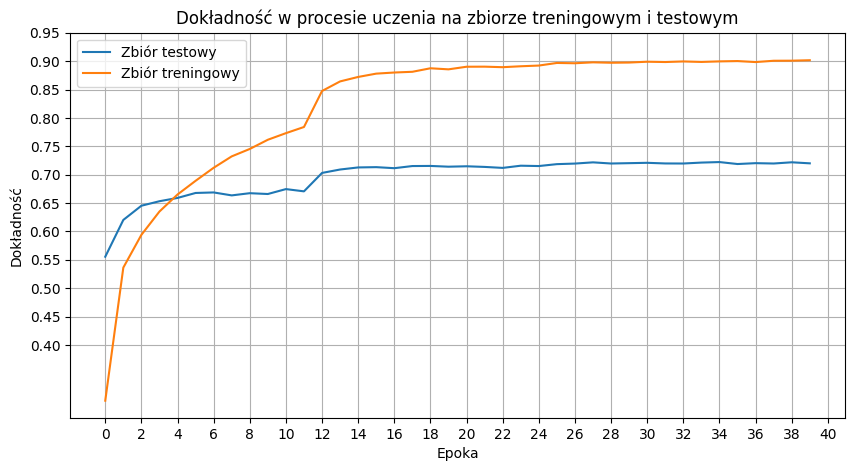

In [75]:
plt.figure(figsize=(10,5))
plt.title("Dokładność w procesie uczenia na zbiorze treningowym i testowym")
plt.plot(test_acc,label="Zbiór testowy")
plt.plot(train_acc,label="Zbiór treningowy")
plt.xlabel("Epoka")
plt.ylabel("Dokładność")
plt.xticks(np.arange(0,42,2))
plt.yticks(np.arange(0.4,1.0,0.05))
plt.grid()
plt.legend()
plt.savefig('tiny_accuracy_200.png')
plt.show()

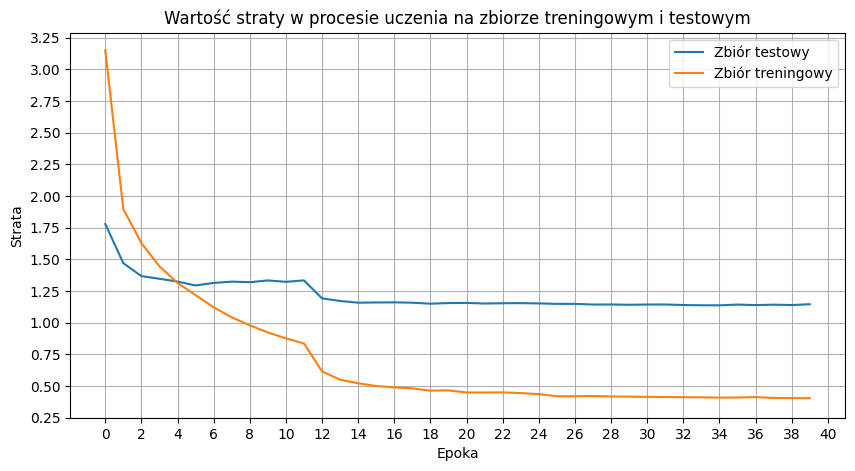

In [77]:
plt.figure(figsize=(10,5))
plt.title("Wartość straty w procesie uczenia na zbiorze treningowym i testowym")
plt.plot(test_loss,label="Zbiór testowy")
plt.plot(train_loss,label="Zbiór treningowy")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.xticks(np.arange(0,42,2))
plt.yticks(np.arange(0.25,3.26,0.25))
plt.grid()
plt.legend()
plt.savefig('tiny_loss_200.png')
plt.show()

# Look inside a dictionary

In [ ]:
checkpoint = torch.load("resnet_cifar100_100classes_e16.pth")

In [ ]:
checkpoint['test_accuracy']

# Separate saving .pth file

In [ ]:
model_save_path = '/kaggle/working/resnet_cifar100_' + str(87) + '.pth'
training_stats = {
  'epoch': epoch+1,
  'model_state_dict': model.state_dict(),
  'optimizer_state_dict': optimizer.state_dict(),
  'scheduler_state_dict': scheduler.state_dict(),
  'loss': average_loss,
  'accuracy': accuracy,
  'test_accuracy': accuracy_test,
  'test_loss': average_loss_test,
  'learning_rate': optimizer.param_groups[0]["lr"]
}

In [ ]:
torch.save(training_stats, model_save_path)

# Testing for 100 classes

In [ ]:
model.eval().to(device)
ep=4
for e in range(ep):
    correct_test, total_test= 0, 0
    with torch.no_grad():
        for (inputs, targets) in test_dl:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            __, predicted = outputs.max(1)
            correct_test += predicted.eq(targets).sum().item()
            total_test+= targets.size(0)

    accuracy_test = correct_test / total_test
    accuracy_test_prc=accuracy_test*100
    print(f'Accuracy on test data: {accuracy_test_prc:.2f} %')

# Plots

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Testing Accuracy")
plt.plot(test_acc,label="Testing accuracy")
plt.plot(train_acc,label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Training and Testing Loss")
plt.plot(test_loss,label="Testing loss")
plt.plot(train_loss,label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Transfering the weights into a new model

Aiming to fine-tune only the classification layer

## Model setup

In [20]:
saved_model_path = '/kaggle/input/tinymodel52/resnet_tiny_52classes_e20.pth'

In [20]:
saved_model_path = '/kaggle/input/tinymodel52/tiny_200classes_after_e50.pth'

In [12]:
saved_model_path = '/kaggle/input/tinymodel52/resnet_tiny_200classes_e25.pth'

In [13]:
model_test=resnet18(weights=None)
model_test.conv1=nn.Conv2d(3,64,kernel_size=3,stride=1,padding=1,bias=False)
model_test.maxpool=nn.Identity()
num_in_ftrs=model_test.fc.in_features
num_out_ftrs=model_test.fc.out_features
num_classes=200
model_test.fc=nn.Linear(num_in_ftrs,num_classes)

## Model weights loading

In [14]:
checkpoint = torch.load(saved_model_path)
model_test.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [23]:
for param in model_test.parameters():
    param.requires_grad = False
for param in model_test.fc.parameters():
    param.requires_grad = True

In [30]:
print([param.requires_grad for param in model_test.parameters()])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]


In [24]:
num_classes=200
model_test.fc =nn.Linear(num_in_ftrs, num_classes)

In [18]:
model_test.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): Identity()
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [ ]:
model_test.eval().to(device)

In [26]:
correct_test, total_test= 0, 0
with torch.no_grad():
    for (inputs, targets) in test_dl:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model_test(inputs)
        __, predicted = outputs.max(1)
        correct_test += predicted.eq(targets).sum().item()
        total_test+= targets.size(0)

accuracy_test = correct_test / total_test
accuracy_test_prc=accuracy_test*100
print(f'Accuracy on test data: {accuracy_test_prc:.2f} %')

NameError: name 'test_dl' is not defined

# Retraining the net

In [27]:
# For optimizer:
max_lr=5e-2
momentum=0.9
weight_decay = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_test.parameters(), lr=max_lr, momentum=momentum, weight_decay=weight_decay)

In [28]:
scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=0.1,patience=7,verbose=True)

In [ ]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.3)

In [ ]:
!rm -rf /kaggle/working/models/

In [29]:
num_epochs=300

In [ ]:
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
for epoch in range(num_epochs):
    model_test.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    data_loader = tqdm(train_dataloader, total=len(train_dataloader), desc=f'Epoch [{epoch + 1}/{num_epochs}]')

    for batch_idx, (inputs, targets) in enumerate(data_loader):
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)


        outputs = model_test(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = outputs.max(1)
        correct_predictions += predicted.eq(targets).sum().item()
        total_samples += targets.size(0)

        # Progress bar description
        data_loader.set_postfix(loss=total_loss / (batch_idx + 1), accuracy=correct_predictions / total_samples)

    average_loss = total_loss / len(train_dataloader)
    accuracy = correct_predictions / total_samples

    train_loss.append(average_loss)
    train_acc.append(accuracy)
    
    # test the model
    correct_test, total_test, total_loss_test = 0, 0, 0
    with torch.no_grad():
        for (inputs, targets) in val_dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model_test(inputs)
            loss = criterion(outputs, targets)
            total_loss_test += loss.item()

            __, predicted = outputs.max(1)
            correct_test += predicted.eq(targets).sum().item()
            total_test+= targets.size(0)

        accuracy_test = correct_test / total_test
        average_loss_test = total_loss_test / len(val_dataloader)
   
    test_loss.append(average_loss_test)
    test_acc.append(accuracy_test)

    print(f'Epoch [{epoch + 1}/{num_epochs}] - Loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.2f}%, Loss on test data: {average_loss_test:.4f} Accuracy on test data: {100 * accuracy_test:.2f} %')


#     if epoch%5==0:
#         model_save_path = '/kaggle/working/resnet_cifar100_100classes_e' + str(epoch+1) + '.pth'
#         training_stats = {
#           'epoch': epoch+1,
#           'model_state_dict': model.state_dict(),
#           'optimizer_state_dict': optimizer.state_dict(),
#           'scheduler_state_dict': scheduler.state_dict(),
#           'loss': average_loss,
#           'accuracy': accuracy,
#           'test_accuracy': accuracy_test,
#           'test_loss': average_loss_test,
#           'learning_rate': optimizer.param_groups[0]["lr"]
#         }
    model_save_path = '/kaggle/working/models/tiny_200classes_after_e' + str(epoch+1) + '.pth'
    training_stats = {
      'epoch': epoch+1,
      'model_state_dict': model_test.state_dict(),
      'optimizer_state_dict': optimizer.state_dict(),
      'scheduler_state_dict': scheduler.state_dict(),
      'loss': average_loss,
      'accuracy': accuracy,
      'test_accuracy': accuracy_test,
      'test_loss': average_loss_test,
      'learning_rate': optimizer.param_groups[0]["lr"]
    }
    scheduler.step(average_loss_test)
    torch.save(training_stats, model_save_path)

Epoch [1/300]: 100%|██████████| 782/782 [02:34<00:00,  5.07it/s, accuracy=0.595, loss=1.52]


Epoch [1/300] - Loss: 1.5203, Accuracy: 59.53%, Loss on test data: 1.6819 Accuracy on test data: 58.03 %


Epoch [2/300]: 100%|██████████| 782/782 [01:00<00:00, 12.82it/s, accuracy=0.666, loss=1.17]


Epoch [2/300] - Loss: 1.1680, Accuracy: 66.59%, Loss on test data: 1.6982 Accuracy on test data: 58.84 %


Epoch [3/300]: 100%|██████████| 782/782 [01:00<00:00, 12.97it/s, accuracy=0.677, loss=1.13]


Epoch [3/300] - Loss: 1.1257, Accuracy: 67.72%, Loss on test data: 1.6968 Accuracy on test data: 59.92 %


Epoch [4/300]: 100%|██████████| 782/782 [00:59<00:00, 13.04it/s, accuracy=0.686, loss=1.09]


Epoch [4/300] - Loss: 1.0949, Accuracy: 68.64%, Loss on test data: 1.6926 Accuracy on test data: 60.58 %


Epoch [5/300]: 100%|██████████| 782/782 [00:58<00:00, 13.27it/s, accuracy=0.693, loss=1.07]


Epoch [5/300] - Loss: 1.0730, Accuracy: 69.31%, Loss on test data: 1.6909 Accuracy on test data: 60.48 %


Epoch [6/300]: 100%|██████████| 782/782 [00:58<00:00, 13.28it/s, accuracy=0.697, loss=1.06]


Epoch [6/300] - Loss: 1.0597, Accuracy: 69.67%, Loss on test data: 1.7353 Accuracy on test data: 59.59 %


Epoch [7/300]: 100%|██████████| 782/782 [00:58<00:00, 13.27it/s, accuracy=0.701, loss=1.04]


Epoch [7/300] - Loss: 1.0439, Accuracy: 70.08%, Loss on test data: 1.7054 Accuracy on test data: 60.60 %


Epoch [8/300]: 100%|██████████| 782/782 [00:58<00:00, 13.28it/s, accuracy=0.703, loss=1.04]


Epoch [8/300] - Loss: 1.0389, Accuracy: 70.28%, Loss on test data: 1.7016 Accuracy on test data: 60.37 %


Epoch [9/300]: 100%|██████████| 782/782 [00:59<00:00, 13.15it/s, accuracy=0.704, loss=1.04]


Epoch [9/300] - Loss: 1.0365, Accuracy: 70.36%, Loss on test data: 1.7174 Accuracy on test data: 60.68 %
Epoch 00009: reducing learning rate of group 0 to 5.0000e-03.


Epoch [10/300]: 100%|██████████| 782/782 [00:59<00:00, 13.23it/s, accuracy=0.742, loss=0.906]


Epoch [10/300] - Loss: 0.9063, Accuracy: 74.22%, Loss on test data: 1.5860 Accuracy on test data: 63.20 %


Epoch [11/300]: 100%|██████████| 782/782 [00:58<00:00, 13.42it/s, accuracy=0.744, loss=0.901]


Epoch [11/300] - Loss: 0.9005, Accuracy: 74.44%, Loss on test data: 1.5786 Accuracy on test data: 63.04 %


Epoch [12/300]: 100%|██████████| 782/782 [00:58<00:00, 13.47it/s, accuracy=0.746, loss=0.894]


Epoch [12/300] - Loss: 0.8941, Accuracy: 74.61%, Loss on test data: 1.5744 Accuracy on test data: 63.13 %


Epoch [13/300]: 100%|██████████| 782/782 [00:57<00:00, 13.49it/s, accuracy=0.747, loss=0.893]


Epoch [13/300] - Loss: 0.8926, Accuracy: 74.66%, Loss on test data: 1.5737 Accuracy on test data: 63.19 %


Epoch [14/300]: 100%|██████████| 782/782 [00:58<00:00, 13.32it/s, accuracy=0.746, loss=0.891]


Epoch [14/300] - Loss: 0.8911, Accuracy: 74.61%, Loss on test data: 1.5661 Accuracy on test data: 63.62 %


Epoch [15/300]: 100%|██████████| 782/782 [00:59<00:00, 13.11it/s, accuracy=0.747, loss=0.891]


Epoch [15/300] - Loss: 0.8909, Accuracy: 74.69%, Loss on test data: 1.5627 Accuracy on test data: 63.30 %


Epoch [16/300]: 100%|██████████| 782/782 [01:01<00:00, 12.82it/s, accuracy=0.746, loss=0.895]


Epoch [16/300] - Loss: 0.8947, Accuracy: 74.58%, Loss on test data: 1.5611 Accuracy on test data: 63.54 %


Epoch [17/300]: 100%|██████████| 782/782 [00:59<00:00, 13.06it/s, accuracy=0.748, loss=0.888]


Epoch [17/300] - Loss: 0.8880, Accuracy: 74.81%, Loss on test data: 1.5680 Accuracy on test data: 63.42 %


Epoch [18/300]: 100%|██████████| 782/782 [00:59<00:00, 13.12it/s, accuracy=0.747, loss=0.897]


Epoch [18/300] - Loss: 0.8969, Accuracy: 74.67%, Loss on test data: 1.5620 Accuracy on test data: 63.23 %


Epoch [19/300]: 100%|██████████| 782/782 [00:59<00:00, 13.22it/s, accuracy=0.75, loss=0.88]  


Epoch [19/300] - Loss: 0.8802, Accuracy: 75.04%, Loss on test data: 1.5581 Accuracy on test data: 63.66 %


Epoch [20/300]: 100%|██████████| 782/782 [00:59<00:00, 13.23it/s, accuracy=0.748, loss=0.887]


Epoch [20/300] - Loss: 0.8873, Accuracy: 74.84%, Loss on test data: 1.5536 Accuracy on test data: 63.40 %


Epoch [21/300]: 100%|██████████| 782/782 [00:59<00:00, 13.21it/s, accuracy=0.751, loss=0.88] 


Epoch [21/300] - Loss: 0.8798, Accuracy: 75.11%, Loss on test data: 1.5457 Accuracy on test data: 63.67 %


Epoch [22/300]: 100%|██████████| 782/782 [00:59<00:00, 13.10it/s, accuracy=0.75, loss=0.882] 


Epoch [22/300] - Loss: 0.8817, Accuracy: 74.96%, Loss on test data: 1.5546 Accuracy on test data: 63.65 %


Epoch [23/300]: 100%|██████████| 782/782 [00:59<00:00, 13.23it/s, accuracy=0.751, loss=0.881]


Epoch [23/300] - Loss: 0.8811, Accuracy: 75.11%, Loss on test data: 1.5517 Accuracy on test data: 63.71 %


Epoch [24/300]: 100%|██████████| 782/782 [00:58<00:00, 13.35it/s, accuracy=0.749, loss=0.883]


Epoch [24/300] - Loss: 0.8833, Accuracy: 74.95%, Loss on test data: 1.5521 Accuracy on test data: 63.24 %


Epoch [25/300]: 100%|██████████| 782/782 [00:58<00:00, 13.31it/s, accuracy=0.751, loss=0.879]


Epoch [25/300] - Loss: 0.8787, Accuracy: 75.10%, Loss on test data: 1.5527 Accuracy on test data: 63.61 %


Epoch [26/300]: 100%|██████████| 782/782 [01:00<00:00, 12.93it/s, accuracy=0.749, loss=0.89] 


Epoch [26/300] - Loss: 0.8896, Accuracy: 74.89%, Loss on test data: 1.5503 Accuracy on test data: 63.54 %


Epoch [27/300]: 100%|██████████| 782/782 [01:00<00:00, 13.01it/s, accuracy=0.752, loss=0.879]


Epoch [27/300] - Loss: 0.8786, Accuracy: 75.15%, Loss on test data: 1.5492 Accuracy on test data: 63.80 %


Epoch [28/300]: 100%|██████████| 782/782 [00:59<00:00, 13.10it/s, accuracy=0.75, loss=0.885] 


Epoch [28/300] - Loss: 0.8846, Accuracy: 74.97%, Loss on test data: 1.5519 Accuracy on test data: 63.30 %


Epoch [29/300]: 100%|██████████| 782/782 [00:57<00:00, 13.51it/s, accuracy=0.752, loss=0.874]


Epoch [29/300] - Loss: 0.8740, Accuracy: 75.17%, Loss on test data: 1.5539 Accuracy on test data: 63.17 %
Epoch 00029: reducing learning rate of group 0 to 5.0000e-04.


Epoch [30/300]: 100%|██████████| 782/782 [00:58<00:00, 13.43it/s, accuracy=0.756, loss=0.864]


Epoch [30/300] - Loss: 0.8644, Accuracy: 75.58%, Loss on test data: 1.5464 Accuracy on test data: 63.59 %


Epoch [31/300]: 100%|██████████| 782/782 [00:59<00:00, 13.05it/s, accuracy=0.758, loss=0.863]


Epoch [31/300] - Loss: 0.8625, Accuracy: 75.76%, Loss on test data: 1.5329 Accuracy on test data: 63.96 %


Epoch [32/300]: 100%|██████████| 782/782 [00:58<00:00, 13.29it/s, accuracy=0.757, loss=0.868]


Epoch [32/300] - Loss: 0.8680, Accuracy: 75.71%, Loss on test data: 1.5345 Accuracy on test data: 64.05 %


Epoch [33/300]: 100%|██████████| 782/782 [00:58<00:00, 13.48it/s, accuracy=0.756, loss=0.866]


Epoch [33/300] - Loss: 0.8661, Accuracy: 75.62%, Loss on test data: 1.5386 Accuracy on test data: 63.70 %


Epoch [34/300]: 100%|██████████| 782/782 [00:57<00:00, 13.62it/s, accuracy=0.756, loss=0.869]


Epoch [34/300] - Loss: 0.8692, Accuracy: 75.58%, Loss on test data: 1.5418 Accuracy on test data: 63.62 %


Epoch [35/300]: 100%|██████████| 782/782 [00:57<00:00, 13.62it/s, accuracy=0.755, loss=0.868]


Epoch [35/300] - Loss: 0.8681, Accuracy: 75.53%, Loss on test data: 1.5418 Accuracy on test data: 63.68 %


Epoch [36/300]: 100%|██████████| 782/782 [00:57<00:00, 13.50it/s, accuracy=0.756, loss=0.871]


Epoch [36/300] - Loss: 0.8713, Accuracy: 75.56%, Loss on test data: 1.5442 Accuracy on test data: 63.34 %


Epoch [37/300]: 100%|██████████| 782/782 [00:58<00:00, 13.48it/s, accuracy=0.756, loss=0.873]


Epoch [37/300] - Loss: 0.8731, Accuracy: 75.59%, Loss on test data: 1.5353 Accuracy on test data: 63.66 %


Epoch [38/300]: 100%|██████████| 782/782 [00:58<00:00, 13.33it/s, accuracy=0.757, loss=0.865]


Epoch [38/300] - Loss: 0.8651, Accuracy: 75.70%, Loss on test data: 1.5379 Accuracy on test data: 64.00 %


Epoch [39/300]: 100%|██████████| 782/782 [00:58<00:00, 13.26it/s, accuracy=0.757, loss=0.865]


Epoch [39/300] - Loss: 0.8649, Accuracy: 75.71%, Loss on test data: 1.5393 Accuracy on test data: 63.97 %
Epoch 00039: reducing learning rate of group 0 to 5.0000e-05.


Epoch [40/300]: 100%|██████████| 782/782 [00:58<00:00, 13.44it/s, accuracy=0.758, loss=0.863]


Epoch [40/300] - Loss: 0.8625, Accuracy: 75.77%, Loss on test data: 1.5452 Accuracy on test data: 63.29 %


Epoch [41/300]: 100%|██████████| 782/782 [00:57<00:00, 13.53it/s, accuracy=0.756, loss=0.871]


Epoch [41/300] - Loss: 0.8708, Accuracy: 75.57%, Loss on test data: 1.5478 Accuracy on test data: 63.56 %


Epoch [42/300]: 100%|██████████| 782/782 [00:57<00:00, 13.62it/s, accuracy=0.755, loss=0.874]


Epoch [42/300] - Loss: 0.8737, Accuracy: 75.47%, Loss on test data: 1.5303 Accuracy on test data: 64.25 %


Epoch [43/300]: 100%|██████████| 782/782 [00:57<00:00, 13.53it/s, accuracy=0.758, loss=0.863]


Epoch [43/300] - Loss: 0.8625, Accuracy: 75.80%, Loss on test data: 1.5400 Accuracy on test data: 63.60 %


Epoch [44/300]: 100%|██████████| 782/782 [00:58<00:00, 13.45it/s, accuracy=0.758, loss=0.861]


Epoch [44/300] - Loss: 0.8609, Accuracy: 75.81%, Loss on test data: 1.5382 Accuracy on test data: 63.94 %


Epoch [45/300]: 100%|██████████| 782/782 [00:59<00:00, 13.21it/s, accuracy=0.758, loss=0.866]


Epoch [45/300] - Loss: 0.8664, Accuracy: 75.78%, Loss on test data: 1.5408 Accuracy on test data: 63.65 %


Epoch [46/300]: 100%|██████████| 782/782 [00:57<00:00, 13.49it/s, accuracy=0.756, loss=0.867]


Epoch [46/300] - Loss: 0.8669, Accuracy: 75.65%, Loss on test data: 1.5397 Accuracy on test data: 63.71 %


Epoch [47/300]: 100%|██████████| 782/782 [00:59<00:00, 13.12it/s, accuracy=0.758, loss=0.86] 


Epoch [47/300] - Loss: 0.8601, Accuracy: 75.79%, Loss on test data: 1.5214 Accuracy on test data: 63.85 %


Epoch [48/300]: 100%|██████████| 782/782 [01:00<00:00, 12.86it/s, accuracy=0.758, loss=0.867]


Epoch [48/300] - Loss: 0.8668, Accuracy: 75.82%, Loss on test data: 1.5336 Accuracy on test data: 64.12 %


Epoch [49/300]: 100%|██████████| 782/782 [01:03<00:00, 12.35it/s, accuracy=0.757, loss=0.864]


Epoch [49/300] - Loss: 0.8641, Accuracy: 75.66%, Loss on test data: 1.5431 Accuracy on test data: 63.64 %


Epoch [50/300]:  48%|████▊     | 373/782 [00:28<00:30, 13.32it/s, accuracy=0.756, loss=0.873]

In [ ]:
ep=10
for e in range(ep):
    correct_test, total_test= 0, 0
    with torch.no_grad():
        for (inputs, targets) in test_dl:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model_test(inputs)
            __, predicted = outputs.max(1)
            correct_test += predicted.eq(targets).sum().item()
            total_test+= targets.size(0)

    accuracy_test = correct_test / total_test
    accuracy_test_prc=accuracy_test*100
    print(f'Accuracy on test data: {accuracy_test_prc:.2f} %')

In [ ]:
model_save_path = '/kaggle/working/resnet_cifar100_transferlearningfor100clasep14' + str(epoch+1) + '.pth'

In [ ]:
training_stats = {
  'epoch': epoch+1,
  'model_state_dict': model_test.state_dict(),
  'optimizer_state_dict': optimizer.state_dict(),
  'scheduler_state_dict': scheduler.state_dict(),
  'loss': average_loss,
  'accuracy': accuracy,
  'test_accuracy': accuracy_test,
  'test_loss': average_loss_test,
  'learning_rate': optimizer.param_groups[0]["lr"]
}

In [ ]:
torch.save(training_stats, model_save_path)

# Test the model, confusion matrix

In [19]:
model_test.eval()
correct_test, total_test= 0, 0
all_preds = []
all_labels = []
with torch.no_grad():
    for (inputs, targets) in val_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model_test(inputs)
        __, predicted = outputs.max(1)
        correct_test += predicted.eq(targets).sum().item()
        total_test+= targets.size(0)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(targets.cpu().numpy())

accuracy_test = correct_test / total_test
accuracy_test_prc=accuracy_test*100
print(f'Accuracy on test data: {accuracy_test_prc:.2f} %')

Accuracy on test data: 72.41 %


In [20]:
true_class_names  = [classes_indexing_inverted[label] for label in all_labels]
pred_class_names  = [classes_indexing_inverted[label] for label in all_preds]

In [30]:
true_superclasses = [filt_class_map[label] for label in true_class_names ]
pred_superclasses = [filt_class_map[label] for label in pred_class_names ]

In [31]:
from collections import defaultdict, Counter

In [32]:
confusion = defaultdict(Counter)
for true_class, pred_class in zip(all_labels, all_preds):
    true_class_name = classes_indexing_inverted[true_class]
    pred_class_name = classes_indexing_inverted[pred_class]
    true_superclass = filt_class_map[true_class_name]
    pred_superclass = filt_class_map[pred_class_name]
    if true_superclass != pred_superclass:
        confusion[true_superclass][pred_class] += 1

In [38]:
df.to_csv('tiny_imagenet_pomyłki_200.csv')

In [37]:
data = []

for superclass_name, (class_index, num_errors) in most_common_errors.items():
    superclass_index = coarse_classes_indexing[superclass_name]
    class_id = classes_indexing_inverted[class_index]
    class_name=class_id_to_name[class_id]
    data.append([superclass_index, superclass_name, class_index, class_name])

# Tworzenie dataframe
df = pd.DataFrame(data, columns=['nr_superklasy', 'nazwa_superklasy', 'nr_klasy', 'nazwa_klasy'])

print(df)

    nr_superklasy  nazwa_superklasy  nr_klasy  \
0              35             paper       112   
1              26         furniture        89   
2              34     outdoor scene       132   
3              33           mollusk        46   
4              14         crocodile         2   
5              32         marsupial        56   
6              17               dog        35   
7              42        technology       128   
8              49           vehicle       197   
9              50            weapon       124   
10             24             fruit       179   
11              0         accessory       148   
12             40             snake        51   
13             12           cooking       178   
14             22              food       177   
15             10          clothing        63   
16             41  sports equipment       100   
17             44               toy        56   
18              7          building       195   
19             29   

In [34]:
most_common_errors = {}
for superclass, errors in confusion.items():
    most_common_error = errors.most_common(1)[0]  # Najczęstsza pomyłka
    most_common_errors[superclass] = most_common_error

print(most_common_errors)

{'paper': (112, 2), 'furniture': (89, 6), 'outdoor scene': (132, 9), 'mollusk': (46, 5), 'crocodile': (2, 3), 'marsupial': (56, 2), 'dog': (35, 4), 'technology': (128, 6), 'vehicle': (197, 6), 'weapon': (124, 4), 'fruit': (179, 4), 'accessory': (148, 5), 'snake': (51, 1), 'cooking': (178, 6), 'food': (177, 23), 'clothing': (63, 8), 'sports equipment': (100, 4), 'toy': (56, 1), 'building': (195, 6), 'instrument': (61, 5), 'hat': (140, 1), 'electronics': (86, 7), 'ungulate': (34, 3), 'decor': (83, 4), 'fish': (196, 2), 'fungus': (0, 1), 'tool': (99, 10), 'container': (80, 5), 'arachnid': (38, 3), 'cat': (28, 3), 'frog': (1, 3), 'primate': (33, 2), 'bird': (51, 4), 'rodent': (58, 3), 'crustacean': (9, 2), 'butterfly': (42, 1), 'bear': (56, 2), 'bug': (199, 4), 'vegetable': (179, 3), 'lab equipment': (159, 2), 'fence': (53, 1), 'hog': (35, 5), 'wild cat': (91, 3), 'plant': (15, 3), 'ball': (120, 2), 'echinoderms': (196, 3), 'salamander': (3, 3), 'coral': (183, 2), 'boat': (198, 3), 'train'

In [41]:
cm = confusion_matrix(all_labels, all_preds)

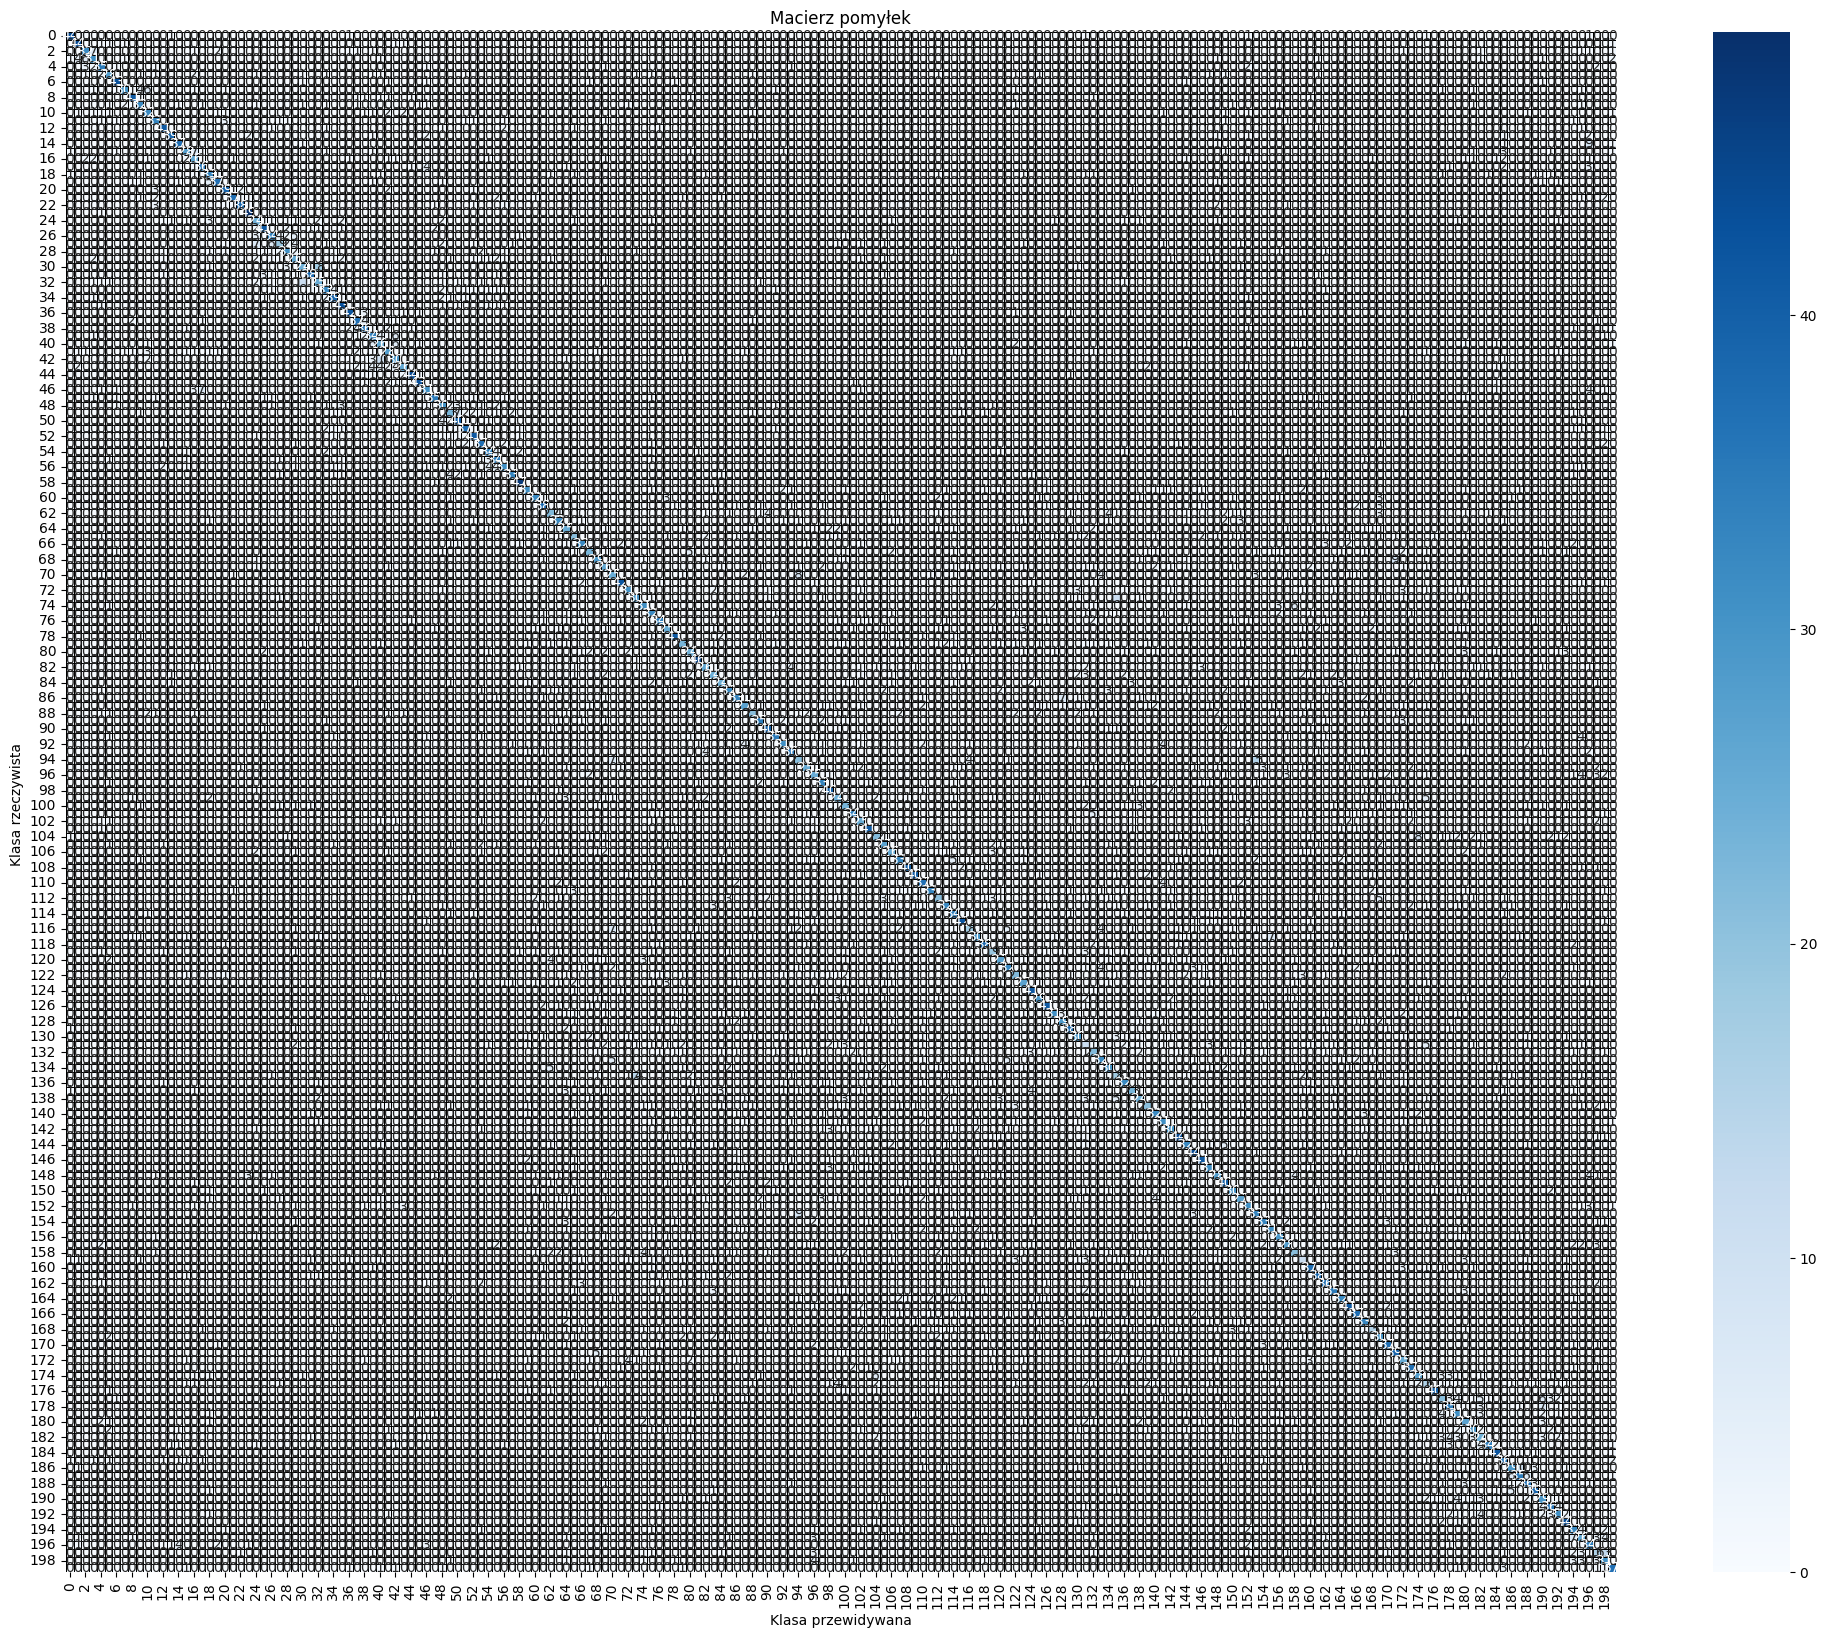

In [42]:
plt.figure(figsize=(25, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidth=0.5)
plt.xlabel('Klasa przewidywana')
plt.ylabel('Klasa rzeczywista ')
plt.title('Macierz pomyłek')
plt.savefig('CM_tiny_52.png')
plt.show()

In [ ]:
for i in all_labels:
    label_name=

# Plots

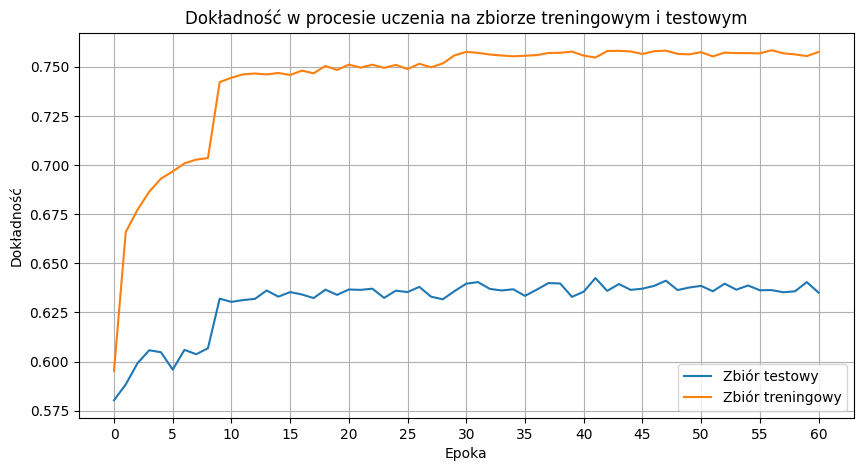

In [34]:
plt.figure(figsize=(10,5))
plt.title("Dokładność w procesie uczenia na zbiorze treningowym i testowym")
plt.plot(test_acc[:61],label="Zbiór testowy")
plt.plot(train_acc[:61],label="Zbiór treningowy")
plt.xlabel("Epoka")
plt.ylabel("Dokładność")
plt.xticks(np.arange(0,61,5))
plt.grid()
plt.legend()
plt.savefig('tiny_accuracy_model19.png')
plt.show()

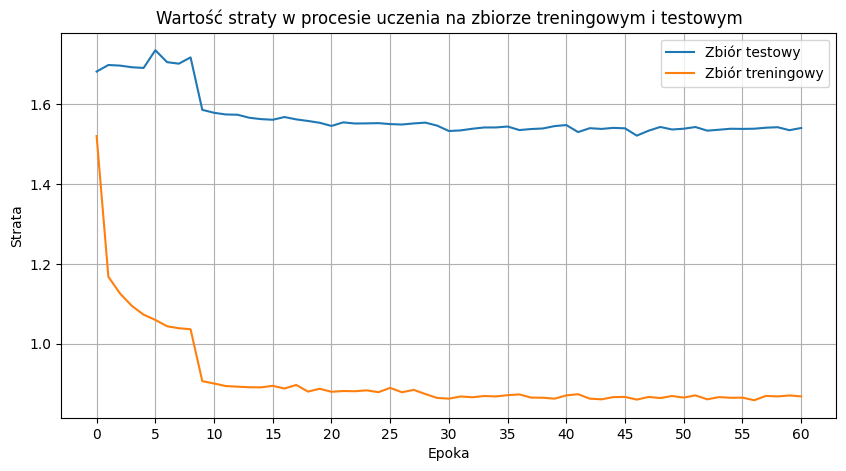

In [37]:
plt.figure(figsize=(10,5))
plt.title("Wartość straty w procesie uczenia na zbiorze treningowym i testowym")
plt.plot(test_loss[:61],label="Zbiór testowy")
plt.plot(train_loss[:61],label="Zbiór treningowy")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.xticks(np.arange(0,61,5))
plt.grid()
plt.legend()
plt.savefig('tiny_loss_odel19.png')
plt.show()